In [ ]:
#loan data

In [2]:
import pandas as pd
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_tree
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/sjskd/anaconda3/pkgs/grabhviz-2.38-hfd603c8_2/Library/bin/graphviz'

C:\Users\arpid\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\arpid\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
#reading the data
raw_df =  pd.read_excel(r"C:\Users\arpid\OneDrive\Documents\MSIS\Sem 1\Data Science\Assignment6_ArpitaDesai\loan.xlsx")
raw_df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [4]:
#assigning x and y
x = raw_df.iloc[:,raw_df.columns != 'Decision']
y = raw_df['Decision']

In [5]:
#numerical columns
inputs_numerical = x.select_dtypes(include='number')
inputs_numerical

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance
0,50.750000,0.585,0,0,145,0
1,19.670000,10.000,0,0,140,0
2,52.830002,15.000,5,14,0,2200
3,22.670000,2.540,2,0,0,0
4,29.250000,13.000,0,0,228,0
...,...,...,...,...,...,...
424,34.169998,2.750,2,0,232,200
425,22.250000,1.250,3,0,280,0
426,23.330000,1.500,1,0,422,200
427,21.000000,4.790,2,1,80,300


In [6]:
#categorical columns
inputs_categorical = x.select_dtypes(include='object')
inputs_categorical.columns

Index(['Sex', 'Res_status', 'Telephone', 'Occupation', 'Job_status',
       'Liab_ref', 'Acc_ref'],
      dtype='object')

In [7]:
#processing the dataset
le = preprocessing.LabelEncoder()
X = inputs_categorical.apply(le.fit_transform)
X.head()

,Sex,Res_status,Telephone,Occupation,Job_status,Liab_ref,Acc_ref
0,1,0,0,11,6,0,0
1,1,1,1,4,0,1,0
2,0,0,0,0,2,0,0
3,1,1,1,0,0,0,0
4,1,0,0,1,0,0,0


In [8]:
#concatenating numerical dataset & label encoded categorical dataset
new_inputs = pd.concat(objs= [X,inputs_numerical],axis='columns')
new_inputs.head()

,Sex,Res_status,Telephone,Occupation,Job_status,Liab_ref,Acc_ref,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance
0,1,0,0,11,6,0,0,50.750000,0.585,0,0,145,0
1,1,1,1,4,0,1,0,19.670000,10.000,0,0,140,0
2,0,0,0,0,2,0,0,52.830002,15.000,5,14,0,2200
3,1,1,1,0,0,0,0,22.670000,2.540,2,0,0,0
4,1,0,0,1,0,0,0,29.250000,13.000,0,0,228,0


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(new_inputs,y, random_state=0)

In [10]:
#implementing xgboost
model = XGBClassifier()
model.fit(X_train,Y_train)


[10:09:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\arpid\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\arpid\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
#prediciton
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)
predictions

array(['accept', 'accept', 'reject', 'reject', 'accept', 'reject',
       'accept', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'accept', 'accept', 'accept', 'accept', 'accept',
       'reject', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'accept', 'accept',
       'reject', 'reject', 'reject', 'accept', 'accept', 'accept',
       'accept', 'reject', 'reject', 'reject', 'accept', 'reject',
       'accept', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'accept', 'accept', 'accept', 'accept',
       'reject', 'accept', 'reject', 'accept', 'accept', 'accept',
       'reject', 'reject', 'reject', 'reject', 'accept', 'accept',
       'reject', 'accept', 'reject', 'reject', 'reject', 'reject',
       'reject', 'accept', 'reject', 'accept', 'accept', 'reject',
       'accept', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'accept', 'accept', 'reject', 'reje

In [12]:
#accuracy
accuracy = accuracy_score(Y_test,predictions)
accuracy

0.75

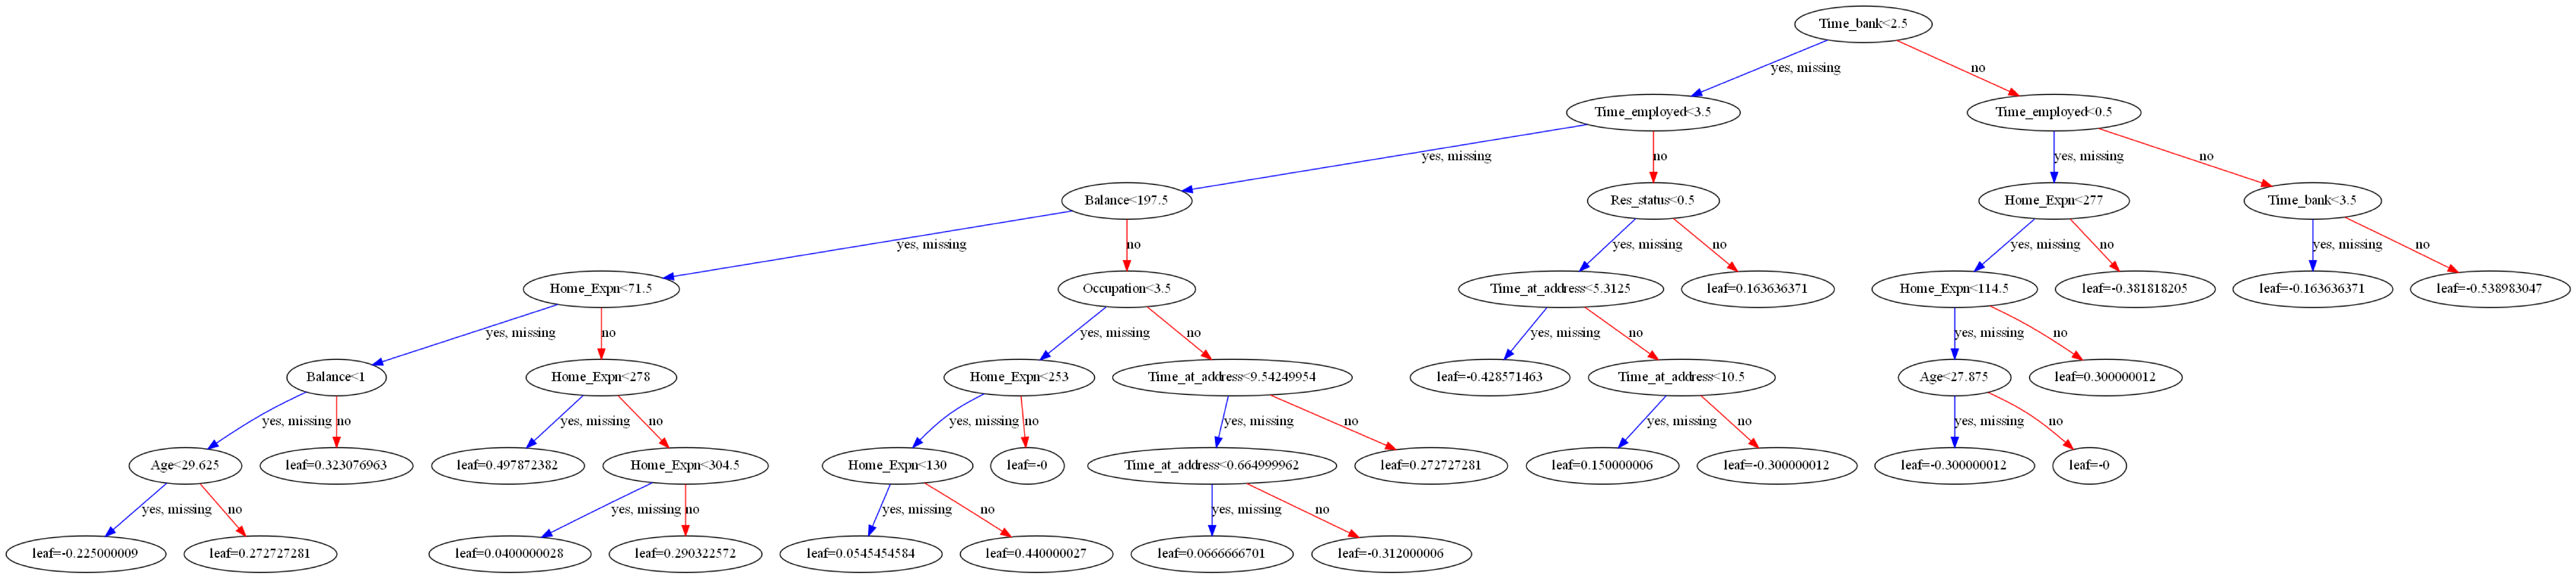

In [13]:
plot_tree(model)
fig = plt.gcf()
fig.set_size_inches(150,100)
plt.show()

In [14]:
#implementing SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train,Y_train)

SVC(random_state=42)

In [15]:
#prediciton
from sklearn.metrics import accuracy_score
predictions = svm_model.predict(X_test)
predictions

array(['reject', 'accept', 'reject', 'reject', 'reject', 'reject',
       'reject', 'accept', 'reject', 'reject', 'reject', 'reject',
       'reject', 'accept', 'reject', 'reject', 'accept', 'reject',
       'reject', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'accept', 'accept',
       'reject', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'accept', 'reject', 'reject', 'reject',
       'reject', 'reject', 'reject', 'accept', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'reject', 'accept',
       'reject', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'accept', 'reject',
       'accept', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'reject', 'reje

In [16]:
#accuracy
accuracy = accuracy_score(Y_test, predictions)
accuracy

0.6296296296296297

<AxesSubplot:>

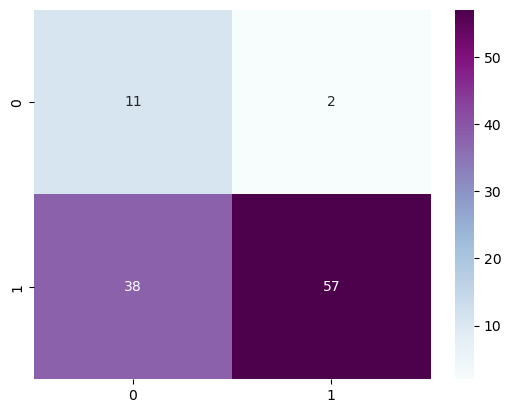

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(predictions, Y_test)
ax = sns.heatmap(cf,annot=True,cmap='BuPu')
ax

In [19]:
#implementing logistic regression

In [20]:
model = LogisticRegression(solver='lbfgs',random_state=0)
model.fit(X_train, Y_train)

C:\Users\arpid\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [21]:
#prediciton
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)
predictions

array(['reject', 'accept', 'reject', 'reject', 'accept', 'reject',
       'reject', 'reject', 'reject', 'accept', 'reject', 'reject',
       'reject', 'reject', 'accept', 'reject', 'accept', 'accept',
       'reject', 'reject', 'accept', 'reject', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'accept', 'reject',
       'reject', 'reject', 'reject', 'accept', 'accept', 'accept',
       'reject', 'accept', 'reject', 'reject', 'accept', 'reject',
       'accept', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'accept', 'accept', 'reject', 'reject',
       'accept', 'accept', 'reject', 'accept', 'accept', 'accept',
       'reject', 'reject', 'reject', 'reject', 'accept', 'accept',
       'reject', 'accept', 'accept', 'reject', 'reject', 'reject',
       'reject', 'accept', 'reject', 'reject', 'accept', 'reject',
       'accept', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'reject', 'accept', 'reject', 'reje

In [22]:
corr = new_inputs.corr()
corr

,Sex,Res_status,Telephone,Occupation,Job_status,Liab_ref,Acc_ref,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance
Sex,1.000000,0.121713,0.121713,-0.139265,0.012999,0.010508,0.095826,0.025167,-0.031594,0.077239,-0.072303,0.115355,-0.045248
Res_status,0.121713,1.000000,1.000000,-0.004165,0.030152,0.018827,-0.000201,-0.080265,-0.100614,-0.074690,-0.132413,-0.006477,-0.068829
Telephone,0.121713,1.000000,1.000000,-0.004165,0.030152,0.018827,-0.000201,-0.080265,-0.100614,-0.074690,-0.132413,-0.006477,-0.068829
Occupation,-0.139265,-0.004165,-0.004165,1.000000,0.208945,-0.035477,-0.082513,0.093087,-0.003602,-0.023573,-0.048098,0.034147,0.011078
Job_status,0.012999,0.030152,0.030152,0.208945,1.000000,-0.016960,-0.000272,0.185145,0.006629,-0.069263,-0.052949,-0.119993,0.053793
Liab_ref,0.010508,0.018827,0.018827,-0.035477,-0.016960,1.000000,0.033197,0.049109,-0.049978,0.122561,0.051000,0.127133,-0.013128
Acc_ref,0.095826,-0.000201,-0.000201,-0.082513,-0.000272,0.033197,1.000000,-0.040445,-0.144258,-0.025000,-0.158334,0.096426,-0.065739
Age,0.025167,-0.080265,-0.080265,0.093087,0.185145,0.049109,-0.040445,1.000000,0.217342,0.426890,0.208736,-0.072254,0.101819
Time_at_address,-0.031594,-0.100614,-0.100614,-0.003602,0.006629,-0.049978,-0.144258,0.217342,1.000000,0.278849,0.202083,-0.267470,0.072235
Time_employed,0.077239,-0.074690,-0.074690,-0.023573,-0.069263,0.122561,-0.025000,0.426890,0.278849,1.000000,0.291542,-0.110933,0.112719


In [23]:
#accuracy
accuracy = accuracy_score(Y_test, predictions)
accuracy

0.7870370370370371

<AxesSubplot:>

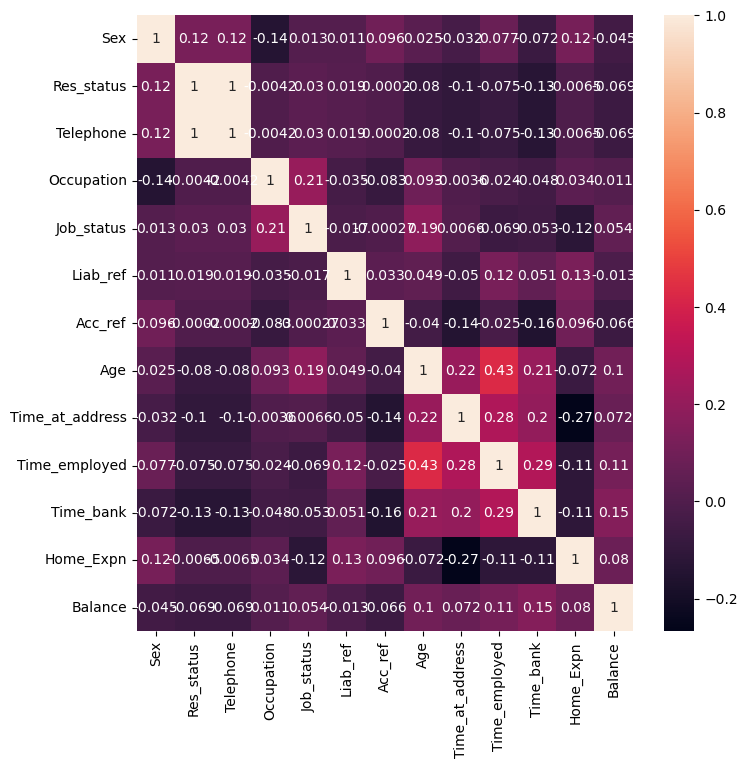

In [24]:
import seaborn as sns
figure, axes = plt.subplots(figsize=(8,8))
sns.heatmap(corr,annot=True,ax=axes)

In [25]:
#boston housing

In [27]:
#reading the data
raw_df =  pd.read_excel(r"C:\Users\arpid\OneDrive\Documents\MSIS\Sem 1\Data Science\Assignment6_ArpitaDesai\boston housing.xls")
raw_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [28]:
#assigning x and y
x = raw_df.iloc[:,raw_df.columns != 'MV']
y = raw_df['MV']

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, random_state=0)

In [30]:
#implementing xgboost
model = XGBRegressor()
model.fit(X_train,Y_train)

C:\Users\arpid\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [31]:
#prediciton

predictions = model.predict(X_test)
predictions

array([24.64309 , 24.147911, 23.71968 , 10.504415, 21.714256, 20.673832,
       20.950768, 20.189478, 22.018091, 16.769361,  6.543146, 13.33306 ,
       16.099257,  8.069107, 50.75817 , 33.128967, 20.080458, 35.630367,
       28.676264, 22.525297, 24.241604, 20.845974, 19.967909, 25.261936,
       21.572592, 17.816984, 17.609032, 16.15132 , 44.480885, 18.763954,
       16.89759 , 17.840073, 19.530197, 21.368628, 25.637325, 19.382717,
        8.770407, 23.767086, 14.584958, 13.139488, 24.559847, 22.741022,
       23.367172, 15.784609, 22.932178, 22.490679, 20.046934, 17.823242,
       14.733561, 24.285906, 17.993326, 20.887712, 20.798204, 36.38366 ,
       15.793893, 19.414024, 20.385572, 18.333006, 13.239334, 19.536625,
       21.703571, 21.93896 , 32.37145 , 30.335447, 19.129427, 28.487337,
       16.316458, 19.533796, 14.036891, 24.12067 , 20.05882 , 22.641207,
       22.328089, 31.236883, 23.671162,  8.193961, 41.669125, 23.103792,
       23.324743, 20.450712, 26.59191 , 18.924347, 

In [32]:
#accuracy
accuracy = model.score(X_test,Y_test)
accuracy

0.7476326721262843

In [33]:
plot_tree(model)
fig = plt.gcf()
fig.set_size_inches(150,100)
plt.show()

In [34]:
#implementing linear regression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [35]:
#prediction
predictions = model.predict(X_test)
predictions

array([24.95233381, 23.61699824, 29.20588635, 11.96070443, 21.33361954,
       19.46954961, 20.42228587, 21.52043978, 18.98954154, 19.95098457,
        4.92468024, 16.09694107, 16.93599529,  5.33508339, 39.84434441,
       32.33549834, 22.32772679, 36.5401783 , 31.03300608, 23.32172361,
       24.92086531, 24.26106574, 20.71504424, 30.45072511, 22.45009347,
        9.87470103, 17.7032449 , 17.9747755 , 35.69932087, 20.79409787,
       18.10554113, 17.6831783 , 19.71354705, 23.79693786, 29.06528878,
       19.23738289, 10.9781578 , 24.56200039, 17.32913134, 15.20340887,
       26.09337497, 20.87706768, 22.26187594, 15.32582787, 22.85847971,
       25.08887201, 19.74138829, 22.70744973,  9.66708424, 24.46176077,
       20.72654134, 17.52545029, 24.45597056, 30.10668781, 13.31250952,
       21.52052357, 20.65642926, 15.34285606, 13.77411348, 22.07429269,
       17.5329393 , 21.6070774 , 32.9105011 , 31.32796205, 17.64346369,
       32.69909983, 18.56579294, 19.32110715, 18.8125674 , 23.04

In [36]:
#accuracy
accuracy = model.score(X_test,Y_test)
accuracy

0.6354638425961332

In [37]:
corr = new_inputs.corr()
corr

,Sex,Res_status,Telephone,Occupation,Job_status,Liab_ref,Acc_ref,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance
Sex,1.000000,0.121713,0.121713,-0.139265,0.012999,0.010508,0.095826,0.025167,-0.031594,0.077239,-0.072303,0.115355,-0.045248
Res_status,0.121713,1.000000,1.000000,-0.004165,0.030152,0.018827,-0.000201,-0.080265,-0.100614,-0.074690,-0.132413,-0.006477,-0.068829
Telephone,0.121713,1.000000,1.000000,-0.004165,0.030152,0.018827,-0.000201,-0.080265,-0.100614,-0.074690,-0.132413,-0.006477,-0.068829
Occupation,-0.139265,-0.004165,-0.004165,1.000000,0.208945,-0.035477,-0.082513,0.093087,-0.003602,-0.023573,-0.048098,0.034147,0.011078
Job_status,0.012999,0.030152,0.030152,0.208945,1.000000,-0.016960,-0.000272,0.185145,0.006629,-0.069263,-0.052949,-0.119993,0.053793
Liab_ref,0.010508,0.018827,0.018827,-0.035477,-0.016960,1.000000,0.033197,0.049109,-0.049978,0.122561,0.051000,0.127133,-0.013128
Acc_ref,0.095826,-0.000201,-0.000201,-0.082513,-0.000272,0.033197,1.000000,-0.040445,-0.144258,-0.025000,-0.158334,0.096426,-0.065739
Age,0.025167,-0.080265,-0.080265,0.093087,0.185145,0.049109,-0.040445,1.000000,0.217342,0.426890,0.208736,-0.072254,0.101819
Time_at_address,-0.031594,-0.100614,-0.100614,-0.003602,0.006629,-0.049978,-0.144258,0.217342,1.000000,0.278849,0.202083,-0.267470,0.072235
Time_employed,0.077239,-0.074690,-0.074690,-0.023573,-0.069263,0.122561,-0.025000,0.426890,0.278849,1.000000,0.291542,-0.110933,0.112719


<AxesSubplot:>

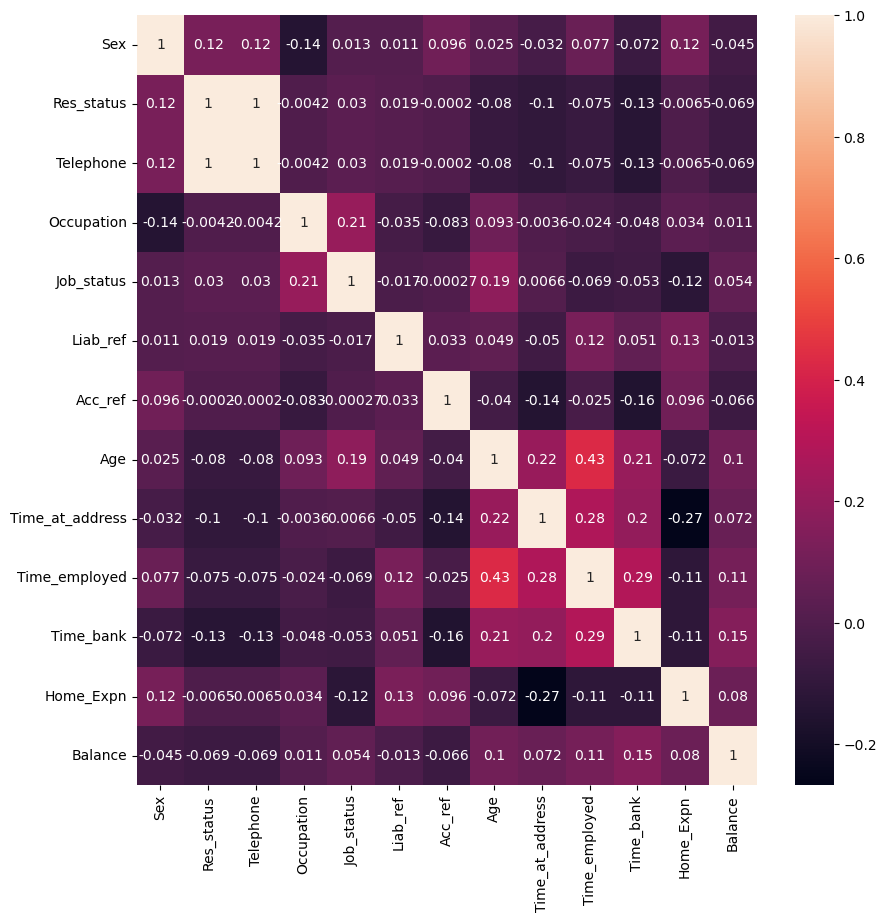

In [38]:
import seaborn as sns
figure, axes = plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,ax=axes)